In [1]:
from dataset import Cifar100
from model import ClassificationModel
from utils import train_classification

import torch
import torch.nn as nn
import torchvision.transforms.functional as F
from torchvision import  transforms
import matplotlib.pyplot as plt
import numpy as np

import random

In [2]:
model = torch.load('ae250.model').encoder.cuda()
class_model = ClassificationModel().cuda()

loss_function = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(class_model.parameters(), lr=5e-3)
class_model

ClassificationModel(
  (conv_block): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(3, 3))
    (1): Dropout2d(p=0.3, inplace=False)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
  )
  (fc_block): Sequential(
    (0): Linear(in_features=1600, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout2d(p=0.2, inplace=False)
    (3): Linear(in_features=1024, out_features=100, bias=True)
  )
  (final): LogSoftmax(dim=1)
)

In [3]:
train_data = Cifar100("CIFAR100/TRAIN")
test_data = Cifar100("CIFAR100/TEST")

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=128, shuffle=True, num_workers=12
)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=128, num_workers=12
)

In [4]:
transform = transforms.RandomApply(
    torch.nn.ModuleList([
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=(0, 90))
    ]), p=0.5)

In [5]:
def plot_result(train_losses, train_accuracies, test_accuracies):
    x = list(range(len(train_losses)))

    f, polts = plt.subplots(1, 2)
    f.set_figheight(5)
    f.set_figwidth(15)

    polts[0].plot(x, train_accuracies)
    polts[0].plot(x, test_accuracies)
    polts[0].legend(["train accuracies", "test accuracies"])

    polts[1].plot(x, train_losses)
    polts[1].legend(["train loss"])

    plt.show()

Train Epoch: 0 train loss: 4.5653, train accuracy: 2.0639  test accuracy: 2.6709
Train Epoch: 1 train loss: 4.4361, train accuracy: 4.3862  test accuracy: 7.3418
Train Epoch: 2 train loss: 4.3148, train accuracy: 6.6061  test accuracy: 9.6456
Train Epoch: 3 train loss: 4.2703, train accuracy: 7.3862  test accuracy: 10.6962
Train Epoch: 4 train loss: 4.2346, train accuracy: 8.4578  test accuracy: 12.3291
Train Epoch: 5 train loss: 4.2147, train accuracy: 8.5115  test accuracy: 10.9747
Train Epoch: 6 train loss: 4.1793, train accuracy: 9.2813  test accuracy: 14.3038
Train Epoch: 7 train loss: 4.1704, train accuracy: 9.8465  test accuracy: 14.1266
Train Epoch: 8 train loss: 4.1393, train accuracy: 10.2558  test accuracy: 13.9241
Train Epoch: 9 train loss: 4.1375, train accuracy: 10.2506  test accuracy: 15.2405


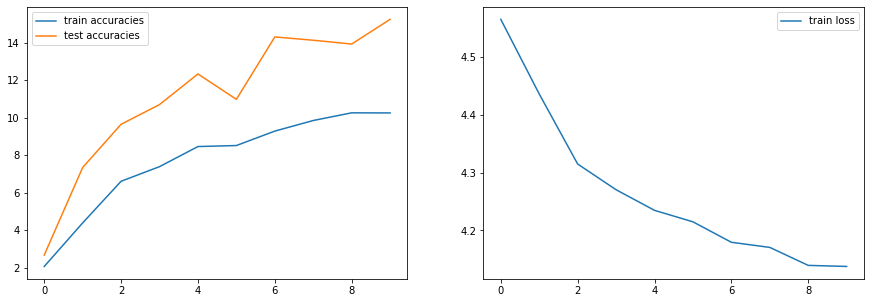

In [6]:
train_losses, train_accuracies, test_accuracies = train_classification(
    10, model, class_model, train_loader, test_loader, loss_function, optimizer, 
    transform=transform, noti_rate=1000
)

plot_result(train_losses, train_accuracies, test_accuracies)

In [7]:
torch.save(class_model, "classification10.model")

Train Epoch: 0 train loss: 4.1152, train accuracy: 10.7289  test accuracy: 13.8987
Train Epoch: 1 train loss: 4.1096, train accuracy: 10.6982  test accuracy: 13.3797
Train Epoch: 2 train loss: 4.1, train accuracy: 11.046  test accuracy: 13.2278
Train Epoch: 3 train loss: 4.088, train accuracy: 11.4322  test accuracy: 16.1392
Train Epoch: 4 train loss: 4.0758, train accuracy: 11.8005  test accuracy: 14.519
Train Epoch: 5 train loss: 4.0521, train accuracy: 12.0921  test accuracy: 16.1772
Train Epoch: 6 train loss: 4.0389, train accuracy: 12.4322  test accuracy: 15.8861
Train Epoch: 7 train loss: 4.027, train accuracy: 12.7366  test accuracy: 15.8987
Train Epoch: 8 train loss: 4.0471, train accuracy: 12.5192  test accuracy: 17.481
Train Epoch: 9 train loss: 4.0298, train accuracy: 12.5243  test accuracy: 16.2278
Train Epoch: 10 train loss: 4.0172, train accuracy: 13.1074  test accuracy: 16.0759
Train Epoch: 11 train loss: 3.9795, train accuracy: 13.8005  test accuracy: 16.962
Train Epoch

Train Epoch: 99 train loss: 3.8263, train accuracy: 18.0691  test accuracy: 16.557


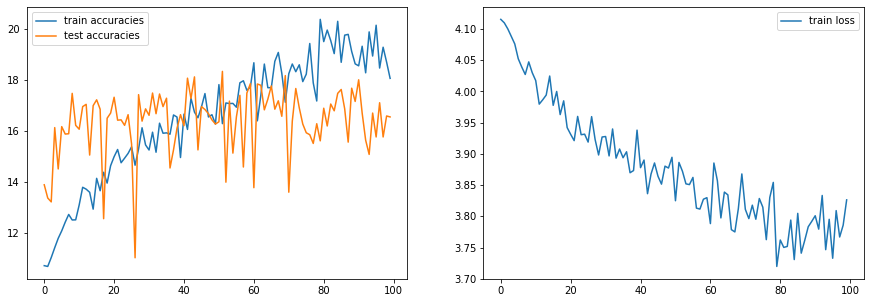

CPU times: user 6min 23s, sys: 1min 24s, total: 7min 47s
Wall time: 8min 22s


In [8]:
%%time
train_losses, train_accuracies, test_accuracies = train_classification(
    100, model, class_model, train_loader, test_loader, loss_function, optimizer, 
    transform=transform, noti_rate=1000
)

plot_result(train_losses, train_accuracies, test_accuracies)

In [9]:
torch.save(class_model, "classification110.model")

Train Epoch: 0 train loss: 3.7546, train accuracy: 19.6292  test accuracy: 17.443
Train Epoch: 1 train loss: 3.7902, train accuracy: 18.6854  test accuracy: 17.6076
Train Epoch: 2 train loss: 3.7968, train accuracy: 18.4629  test accuracy: 16.8481
Train Epoch: 3 train loss: 3.68, train accuracy: 21.2046  test accuracy: 16.9241
Train Epoch: 4 train loss: 3.712, train accuracy: 20.7008  test accuracy: 16.0886
Train Epoch: 5 train loss: 3.8029, train accuracy: 18.7417  test accuracy: 17.8608
Train Epoch: 6 train loss: 3.7063, train accuracy: 21.1125  test accuracy: 15.9747
Train Epoch: 7 train loss: 3.7606, train accuracy: 19.7877  test accuracy: 15.519
Train Epoch: 8 train loss: 3.7662, train accuracy: 19.5985  test accuracy: 17.1899
Train Epoch: 9 train loss: 3.7765, train accuracy: 19.4859  test accuracy: 15.8734
Train Epoch: 10 train loss: 3.7731, train accuracy: 19.2174  test accuracy: 16.3418
Train Epoch: 11 train loss: 3.7314, train accuracy: 20.7187  test accuracy: 17.6203
Train E

Train Epoch: 99 train loss: 3.7483, train accuracy: 20.4092  test accuracy: 15.8481
Train Epoch: 100 train loss: 4.1664, train accuracy: 18.5499  test accuracy: 15.4304
Train Epoch: 101 train loss: 3.6497, train accuracy: 22.4629  test accuracy: 15.2785
Train Epoch: 102 train loss: 3.7227, train accuracy: 21.491  test accuracy: 15.3544
Train Epoch: 103 train loss: 3.6563, train accuracy: 22.5806  test accuracy: 16.2405
Train Epoch: 104 train loss: 3.7232, train accuracy: 20.9258  test accuracy: 15.443
Train Epoch: 105 train loss: 3.7143, train accuracy: 21.3504  test accuracy: 15.2532
Train Epoch: 106 train loss: 3.689, train accuracy: 21.8005  test accuracy: 15.8861
Train Epoch: 107 train loss: 3.7428, train accuracy: 20.7775  test accuracy: 15.9494
Train Epoch: 108 train loss: 3.7838, train accuracy: 19.5115  test accuracy: 16.3797
Train Epoch: 109 train loss: 3.6803, train accuracy: 21.9182  test accuracy: 16.8608
Train Epoch: 110 train loss: 3.6731, train accuracy: 21.9258  test ac

Train Epoch: 196 train loss: 3.7073, train accuracy: 21.5703  test accuracy: 16.0127
Train Epoch: 197 train loss: 3.7242, train accuracy: 20.7801  test accuracy: 17.1646
Train Epoch: 198 train loss: 3.6733, train accuracy: 22.6854  test accuracy: 16.4684
Train Epoch: 199 train loss: 3.7008, train accuracy: 22.133  test accuracy: 16.8987


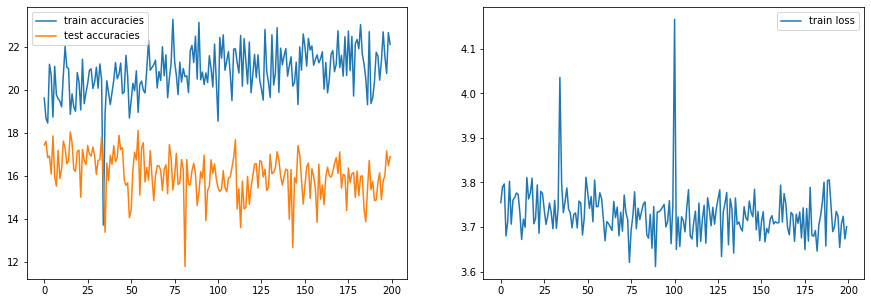

CPU times: user 13min 7s, sys: 2min 49s, total: 15min 57s
Wall time: 17min 8s


In [10]:
%%time
train_losses, train_accuracies, test_accuracies = train_classification(
    200, model, class_model, train_loader, test_loader, loss_function, optimizer, 
    transform=transform, noti_rate=1000
)

plot_result(train_losses, train_accuracies, test_accuracies)

In [11]:
torch.save(class_model, "classification310.model")